### Imports

In [1]:
import numpy as np
from PIL import Image, ImageOps
from tqdm import tqdm
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

### Definitions of helper functions

In [16]:
def get_grayscale_image_arr(path):
    img_array = np.array(ImageOps.grayscale(Image.open(path))).astype(int)
    img_array[img_array != 255] = 0
    return img_array.astype(bool).astype(int)

def get_color(flag):
    return 90 + 100 * (flag % 2)

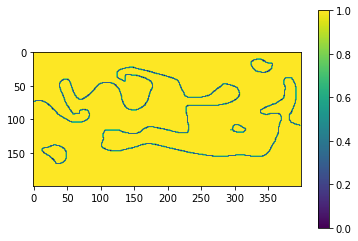

In [22]:
a = get_grayscale_image_arr('../imgs/target0/0001.png')
plt.imshow(a)
plt.colorbar()

In [26]:
np.unique(a)

array([0, 1])

### Definitions of main functions

In [17]:
def color_and_check_neighbors(arr, x, y, color):
    stack = deque()
    stack.append((x,y))
    deltas = [[-1, 0], [1, 0], [0, 1], [0, -1]]
    length, width = arr.shape
    while len(stack):
        x, y = stack.popleft()
        arr[x][y] = color
        for dx, dy in deltas:
            if x+dx >= 0 and x+dx < length and y+dy >= 0 and y+dy < width and arr[x+dx][y+dy] == 1:
                if (x+dx, y+dy) not in stack:
                    stack.append((x+dx, y+dy))

def get_result(path):
    res = get_grayscale_image_arr(path)
    length, width = res.shape
    flag = 1
    for i in range(length):
        for j in range(width):
            if res[i][j] == 1:
                if j == 0 and i > 0 and res[i-1][j] == 0:
                    flag+=1
                if res[i][j-1] == 0 and res[i-1][j] == 0:
                    s = j-1
                    while res[i][s] == 0 and s > 0:
                        s-=1
                    if res[i][s] == get_color(flag):
                        flag += 1
                color_and_check_neighbors(res, i, j, get_color(flag))
    #res_img.resize((width, length))
    return res, Image.fromarray(res.astype('uint8'))

def plot_result(path):
    plt.figure(figsize=(30,15))
    
    plt.subplot(1, 2, 1,).set_title('Input')
    plt.imshow(ImageOps.grayscale(Image.open(path)), cmap='gray')

    plt.subplot(1, 2, 2).set_title('Output')
    plt.imshow(ImageOps.grayscale(get_result(path)[1]), cmap='gray')
    

### Testing the algorithm

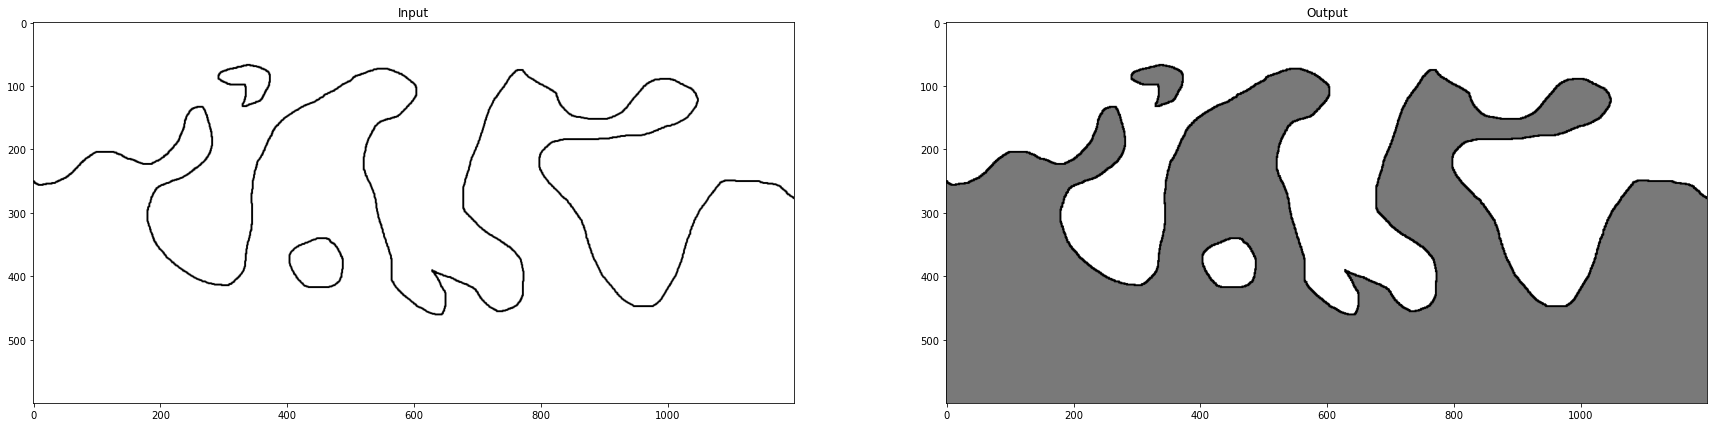

In [18]:
path = '../imgs/target0/2.png'
# ans, img = get_result(path)
plot_result(path)

In [ ]:
# plot_result('./imgs/FS.bmp')
# plot_result('./imgs/345.bmp')
# plot_result('./imgs/123.bmp')
# plot_result('./imgs/4444.png')

In [14]:
img.save('1.png')